In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from moscot.problems.label_transfer import LabelProblem

In [6]:
adata_2019 = sc.read("/storage/groups/ml01/workspace/dominik.klein/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [7]:
adata_2022 = sc.read("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad")

In [8]:
adata_19 = adata_2019[adata_2019.obs["day"].isin(("14.5", "15.5"))].copy()
del adata_2019

In [9]:
adata_2022.obs["day"] = adata_2022.obs.apply(lambda x: "14.5" if x["sample"]=="E14.5" else "15.5", axis=1)

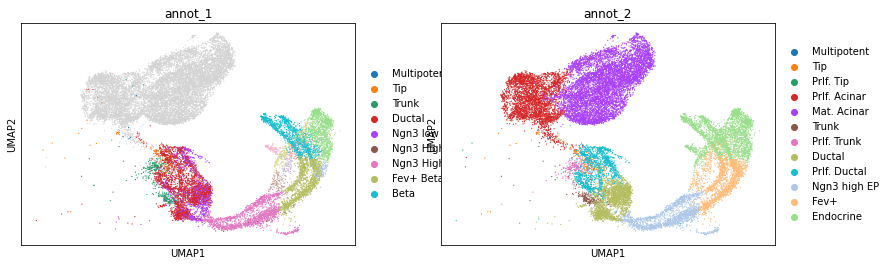

In [10]:
adata_19.obs["annot_1"] = adata_19.obs["clusters_fig6_alpha_final"].copy()
adata_19.obs["annot_2"] = adata_19.obs["clusters_fig3_final_noep"].copy()
sc.pl.umap(adata_19, color=["annot_1", "annot_2"])

In [11]:
adata_19.obs["celltype"] = np.where(~pd.isnull(adata_19.obs["annot_1"]), adata_19.obs["annot_1"], adata_19.obs["annot_2"])

In [12]:
pd.isnull(adata_19.obs["celltype"]).sum()

0

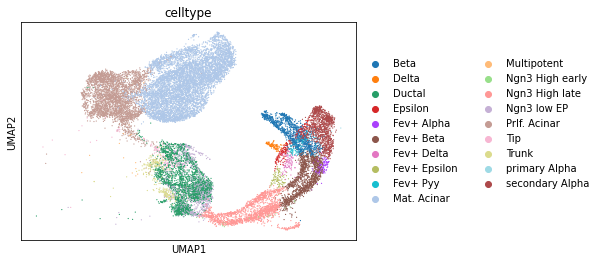

In [13]:
sc.pl.umap(adata_19, color=["celltype"])

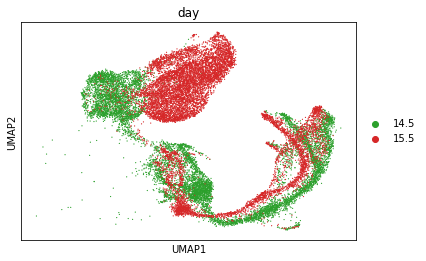

In [14]:
sc.pl.umap(adata_19, color=["day"])

In [15]:
len(adata_19.var.index), len(adata_2022.var.index), len(set(adata_19.var.index).intersection(adata_2022.var.index))

(17327, 14663, 13255)

In [16]:
common_genes= list(set(adata_19.var.index).intersection(adata_2022.var.index))

In [17]:
adata_19 = adata_19[:,common_genes]
adata_2022 = adata_2022[:,common_genes]

In [18]:
del adata_2022.layers

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/_core/anndata.py:739: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self.layers = dict()


In [19]:
adata = adata_19.concatenate(adata_2022, join="outer")

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [27]:
#del adata_19
#del adata_2022

In [14]:
#adata.obs = adata.obs[["day", "batch"]]

In [16]:
#adata.var = adata.var[["n_cells-0"]]

In [24]:
#adata.write("/home/icb/dominik.klein/tmp.h5ad")

In [25]:
#del adata_2019
#del adata_2022

In [ ]:
#adata_0 = adata[adata.obs["day"]=="14.5"].copy()

In [20]:
adata.obs["batch"].value_counts()

0    20519
1    16978
Name: batch, dtype: int64

In [21]:
sc.pp.pca(adata, n_comps=30)

In [42]:
lp = LabelProblem(adata)
lp = lp.prepare("batch", joint_attr="X_pca", labelled_batch="0", batch_to_label="1")

In [43]:
lp.solve(scale_cost="mean", epsilon=1e-2, tau_a=0.9, tau_b=0.9)

In [34]:
lp["0", "1"].xy.data.shape, lp["0", "1"].xy.data_y.shape

((20519, 30), (16978, 30))

In [44]:
lp["0", "1"].solution._output

SinkhornOutput(f=DeviceArray([0.43722305, 0.09709129, 0.07391673, ..., 0.25533673,
             0.26407552, 0.18133612], dtype=float32), g=DeviceArray([0.19876286, 0.29718748, 0.07333265, ..., 0.2138736 ,
             0.17694883, 0.30313548], dtype=float32), errors=DeviceArray([ 2.4668321e-02,  3.0081104e-03,  3.6603212e-04,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
             -1.0000000e+00, -1.0000000e+00, -1.0000000e+00,
  

In [45]:
lp["0", "1"].solution.transport_matrix.sum()

DeviceArray(0.16001299, dtype=float32)

In [46]:
adata.obs["celltype"] = adata.obs["celltype"].astype("category")

In [47]:
lp.transition_matrix(clusters_source="celltype", clusters_target="celltype")

,Acinar,Beta,Delta,Ductal,Epsilon,Fev+,Fev+ Alpha,Fev+ Beta,Fev+ Delta,Fev+ Epsilon,...,Ngn3 High cycling,Ngn3 High early,Ngn3 High late,Ngn3 low EP,Prlf. Acinar,Prlf. Trunk,Tip,Trunk,primary Alpha,secondary Alpha
Acinar,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00
Beta,1.613392e-07,9.568012e-01,3.607484e-01,0.0,0.0,1.049221e-01,2.681861e-01,5.427699e-01,0.0,1.257260e-01,...,5.460290e-03,3.004931e-03,2.277353e-02,3.958394e-04,8.038010e-13,4.328504e-08,0.0,0.0,0.0,1.304412e-01
Delta,1.771248e-08,4.302690e-03,2.350378e-01,0.0,0.0,1.180738e-04,2.219351e-03,2.489921e-03,0.0,7.733908e-03,...,3.668041e-08,1.465683e-04,7.198234e-04,5.361116e-06,2.753503e-11,7.949477e-09,0.0,0.0,0.0,4.359425e-03
Ductal,2.387812e-05,1.971945e-06,2.216110e-11,0.0,0.0,3.063427e-04,2.963513e-07,4.375780e-05,0.0,2.045187e-04,...,1.947249e-03,4.264944e-02,2.044410e-03,5.809247e-01,2.864618e-04,3.177356e-01,0.0,0.0,0.0,2.468347e-08
Epsilon,5.665955e-07,2.186547e-04,3.035147e-02,0.0,0.0,1.536816e-03,3.307046e-03,3.443095e-04,0.0,3.956551e-01,...,1.575431e-06,1.821133e-03,4.038818e-03,1.052187e-04,1.074745e-10,3.216917e-07,0.0,0.0,0.0,5.945693e-02
Fev+,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00
Fev+ Alpha,6.357158e-11,1.414582e-05,2.883321e-03,0.0,0.0,5.763538e-02,9.225187e-02,3.687826e-02,0.0,6.516809e-03,...,1.795837e-05,8.215524e-06,1.125931e-03,2.476740e-05,7.562985e-17,6.468366e-12,0.0,0.0,0.0,6.797300e-05
Fev+ Beta,2.440926e-08,1.601600e-03,2.861953e-02,0.0,0.0,7.564475e-01,2.450919e-01,3.102450e-01,0.0,1.191492e-01,...,3.006270e-04,3.279278e-03,2.648159e-01,5.361443e-04,5.812342e-12,2.065563e-09,0.0,0.0,0.0,1.081581e-03
Fev+ Delta,5.742750e-11,6.442987e-05,4.541707e-02,0.0,0.0,8.331614e-03,2.312345e-03,3.078587e-03,0.0,8.227413e-02,...,1.038086e-06,2.302457e-05,1.695319e-03,2.268228e-06,4.787832e-16,1.606675e-10,0.0,0.0,0.0,9.039876e-05
Fev+ Epsilon,1.025887e-09,2.141955e-09,3.168709e-05,0.0,0.0,1.048503e-02,4.003525e-05,3.087278e-05,0.0,1.304109e-01,...,1.602329e-06,1.728356e-04,1.804635e-02,2.457001e-08,3.038894e-17,1.397448e-10,0.0,0.0,0.0,1.464721e-08


In [60]:
adata

AnnData object with n_obs × n_vars = 37497 × 13255
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'annot_1', 'annot_2', 'celltype', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_genes', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scru

In [84]:
preds,scores = lp.get_labels(clusters_labelled="celltype", clusters_unlabelled="leiden", top_k=5, return_values=True)
preds 

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:33: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp=tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]


,1,2,3,4,5
0,Ductal,Ngn3 low EP,Prlf. Acinar,Tip,Trunk
1,Fev+ Beta,Beta,Fev+ Alpha,Ngn3 High late,secondary Alpha
2,Ngn3 High late,Fev+ Beta,Beta,Fev+ Epsilon,Ngn3 High early
3,Beta,Fev+ Beta,secondary Alpha,Fev+ Alpha,Fev+ Pyy
4,Ductal,Ngn3 low EP,Tip,Prlf. Acinar,Trunk
5,Prlf. Acinar,Mat. Acinar,Ductal,Tip,Ngn3 low EP
6,Ngn3 High late,Ngn3 low EP,Ductal,Prlf. Acinar,Ngn3 High early
7,Mat. Acinar,Prlf. Acinar,Tip,Ductal,Trunk
8,Ductal,Ngn3 low EP,Ngn3 High late,Prlf. Acinar,Tip
9,Prlf. Acinar,Mat. Acinar,Tip,Ductal,Trunk


In [96]:
scores.loc[3]

1    0.542770
2    0.310245
3    0.095558
4    0.036878
5    0.004754
Name: 3, dtype: float64

In [66]:
#neighbors = sc.pp.neighbors(adata[adata.obs["batch"]=="1"], copy=True)

In [67]:
adata_22 = adata[adata.obs["batch"]=="1"]

In [68]:
sc.pp.neighbors(adata_22)

In [69]:
sc.tl.umap(adata_22)

In [70]:
adata_22.obs["celltype"]

AAACAGCCAACAGCCT-1-0-1          Fev+ Beta
AAACAGCCAACCCTCC-1-0-1         Fev+ Alpha
AAACAGCCACCTGTAA-1-0-1        Prlf. Trunk
AAACAGCCACTAAGCC-1-0-1          Fev+ Beta
AAACAGCCAGGATAAC-1-0-1    Ngn3 High early
                               ...       
TTTGTGTTCTTGTTCG-1-1-1        Ngn3 low EP
TTTGTTGGTATTGAGT-1-1-1        Ngn3 low EP
TTTGTTGGTCCTAAGA-1-1-1        Ngn3 low EP
TTTGTTGGTTAACAGT-1-1-1        Multipotent
TTTGTTGGTTGTTGCT-1-1-1       Fev+ Epsilon
Name: celltype, Length: 16978, dtype: category
Categories (15, object): ['Acinar', 'Beta', 'Delta', 'Fev+', ..., 'Ngn3 low EP', 'Prlf. Acinar', 'Prlf. Trunk', 'secondary Alpha']

In [80]:
preds.loc["3", 0]

'Fev+ Pyy'

In [77]:
adata_22.obs.loc[:, "leiden"]

AAACAGCCAACAGCCT-1-0-1     3
AAACAGCCAACCCTCC-1-0-1    12
AAACAGCCACCTGTAA-1-0-1     9
AAACAGCCACTAAGCC-1-0-1     3
AAACAGCCAGGATAAC-1-0-1     6
                          ..
TTTGTGTTCTTGTTCG-1-1-1     0
TTTGTTGGTATTGAGT-1-1-1     8
TTTGTTGGTCCTAAGA-1-1-1     0
TTTGTTGGTTAACAGT-1-1-1     5
TTTGTTGGTTGTTGCT-1-1-1    15
Name: leiden, Length: 16978, dtype: category
Categories (21, object): ['0', '1', '2', '3', ..., '17', '18', '19', '20']

In [93]:
adata_22.obs["predictions"] = adata_22.obs.apply(lambda x: preds.loc[x["leiden"], 1], axis=1)

In [97]:
adata_22.obs["predictions_confidence"] = adata_22.obs.apply(lambda x: scores.loc[int(x["leiden"]), 1], axis=1)

In [87]:
adata_22.obs["predictions"]

AAACAGCCAACAGCCT-1-0-1               Beta
AAACAGCCAACCCTCC-1-0-1    secondary Alpha
AAACAGCCACCTGTAA-1-0-1       Prlf. Acinar
AAACAGCCACTAAGCC-1-0-1               Beta
AAACAGCCAGGATAAC-1-0-1     Ngn3 High late
                               ...       
TTTGTGTTCTTGTTCG-1-1-1             Ductal
TTTGTTGGTATTGAGT-1-1-1             Ductal
TTTGTTGGTCCTAAGA-1-1-1             Ductal
TTTGTTGGTTAACAGT-1-1-1       Prlf. Acinar
TTTGTTGGTTGTTGCT-1-1-1            Epsilon
Name: predictions, Length: 16978, dtype: object

In [88]:
adata_22.obs["predictions"].value_counts()

Ductal             5227
Ngn3 High late     3316
Beta               1987
Prlf. Acinar       1896
Fev+ Beta          1530
Mat. Acinar        1334
secondary Alpha    1186
Epsilon             502
Name: predictions, dtype: int64

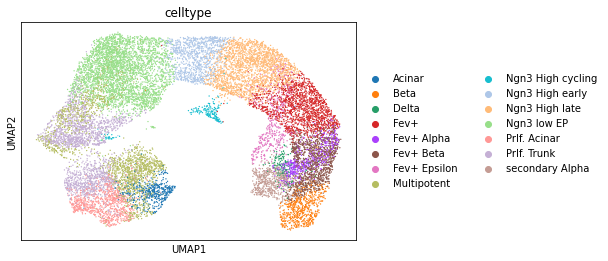

In [89]:
sc.pl.umap(adata_22, color="celltype")

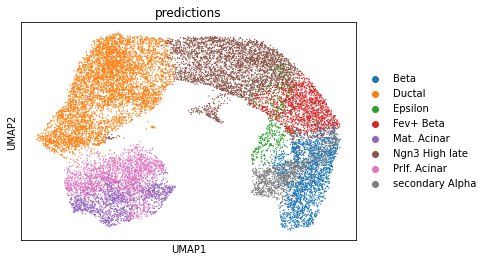

In [90]:
sc.pl.umap(adata_22, color="predictions")

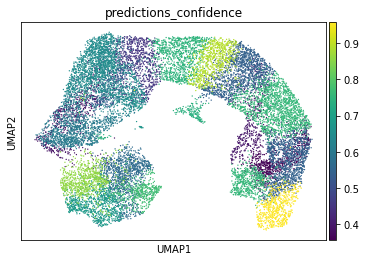

In [98]:
sc.pl.umap(adata_22, color="predictions_confidence")